<a href="https://colab.research.google.com/github/chunyuan0221/3rd-ML100days/blob/master/Day_095_CNN_Pooling_Padding_HW.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 作業目標:
  - 了解 Padding 的作法
  - 了解 Pooling 的作法

# 作業重點:
  - 調整Padding 的設定, 看 Pad 後的結果
  - 調整Pooling 的設定, 看 Pooling 後的結果

In [0]:
import numpy as np
import h5py
import matplotlib.pyplot as plt

# 繪圖結果直接顯示在Jupyter cell 之內
%matplotlib inline  
plt.rcParams['figure.figsize'] = (5.0, 4.0) #  設定繪圖板的大小
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'

# autoreload。可以讓我們不退出IPython就動態修改代碼，在執行代碼前IPython會幫我們自動重載改動的模塊
%load_ext autoreload
%autoreload 2
np.random.seed(1)

- padding時，周圍填的值需要設定 : 
  1. constant_values=0 : 灰階
  2. constant_values=1 : 基本上應該是白色(但這邊不是)
  3. constant_values=-1 : 黑色
  4. 有時候我們會做正規化(影像value / 255)，這時候圖片就會介於0~1之間，也就成了灰階


In [0]:
# GRADED FUNCTION: zero_pad
def zero_pad(X, pad):
    """
    對image X 做 zero-padding. 
    參數定義如下:
    X -- python numpy array, 呈現維度 (m, n_H, n_W, n_C), 代表一批 m 個圖像
         n_H: 圖高, n_W: 圖寬, n_C: color channels 數
    pad -- 整數, 加幾圈的 zero padding.
    Returns:
    X_pad -- image of shape (m, n_H + 2*pad, n_W + 2*pad, n_C) 做完zero-padding 的結果
    """
    
    X_pad = np.pad(X, ((0, 0), (pad, pad), (pad, pad), (0, 0)), 'constant', constant_values=(0, 0))
  
    return X_pad

x.shape = (2, 3, 3, 3)
x_pad.shape = (2, 7, 7, 3)
x[1,1] = [[-1.11731035  0.2344157   1.65980218]
 [ 0.74204416 -0.19183555 -0.88762896]
 [-0.74715829  1.6924546   0.05080775]]
x_pad[1,1] = [[0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]]


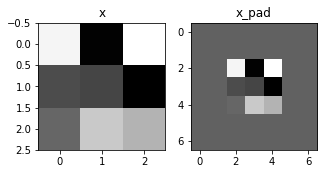

In [3]:
#作業修改
np.random.seed(1)
x = np.random.randn(2, 3, 3, 3)
x_pad = zero_pad(x, 2)

print ("x.shape =", x.shape)
print ("x_pad.shape =", x_pad.shape)
print ("x[1,1] =", x[1,1])
print ("x_pad[1,1] =", x_pad[1,1])
fig, axarr = plt.subplots(1, 2)
axarr[0].set_title('x')
axarr[0].imshow(x[0,:,:,0])
axarr[1].set_title('x_pad')
axarr[1].imshow(x_pad[0,:,:,0])
plt.show()

In [0]:
# GRADED FUNCTION: pool_forward
def pool_forward(A_prev, hparameters, mode = "max"):
    """
    設計一個前行網路的池化層
    參數定義如下:
    A_prev -- 輸入的numpy 陣列, 維度 (m, n_H_prev, n_W_prev, n_C_prev)
    hparameter 超參數 --  "f" and "stride" 所形成的python 字典
    "f" -- pooling filter的size
    "stride" -- stride平移步伐大小
    mode -- 池化的模式: "max" or "average"
    
    返回:
        A -- 輸出的池化層, 維度為 (m, n_H, n_W, n_C) 的 numpy 陣列
        cache -- 可以應用在 backward pass pooling layer 資料, 包含 input and hparameter
    """

    # 檢索尺寸 from the input shape
    (m, n_H_prev, n_W_prev, n_C_prev) = A_prev.shape
 
    # 檢索超參數 from "hparameters"
    f = hparameters["f"]
    stride = hparameters["stride"]

    # 定義輸出的dimensions
    n_H = int(1 + (n_H_prev - f) / stride)
    n_W = int(1 + (n_W_prev - f) / stride)
    n_C = n_C_prev

    # 初始化輸出的 matrix A
    A = np.zeros((m, n_H, n_W, n_C))

    ### 程式起始位置  ###
    for i in range(m): # 訓練樣本的for 迴圈
        for h in range(n_H): # 輸出樣本的for 迴圈, 針對vertical axis
            for w in range(n_W): #  輸出樣本的for 迴圈, 針對 horizontal axis
                for c in range (n_C): #  輸出樣本的for 迴圈, 針對channels

                     # 找出特徵圖的寬度跟高度四個點
                    vert_start = h * stride
                    vert_end = h * stride+ f
                    horiz_start = w * stride
                    horiz_end = w * stride + f

                    # 定義第i個訓練示例
                    a_prev_slice = A_prev[i, vert_start:vert_end, horiz_start:horiz_end,c]

                    # 計算輸入data 的池化結果. 使用 if statment 去做分類
                    if mode == "max":
                        A[i, h, w, c] = np.max(a_prev_slice)
                    elif mode == "average":
                        A[i, h, w, c] = np.mean(a_prev_slice)

                        ### 程式結束  ###
    
    # 儲存輸入的特徵圖跟所設定的超參數, 可以用在 pool_backward()
    cache = (A_prev, hparameters)
    
    # 確認輸出的資料維度
    assert(A.shape == (m, n_H, n_W, n_C))
    return A, cache

mode = max
A = [[[[1.62434536 0.         0.        ]
   [1.62434536 0.86540763 0.        ]
   [1.74481176 0.86540763 0.3190391 ]
   [1.74481176 0.86540763 0.3190391 ]
   [1.74481176 0.         0.3190391 ]]

  [[1.62434536 1.46210794 0.        ]
   [1.62434536 1.46210794 1.13376944]
   [1.74481176 1.46210794 1.13376944]
   [1.74481176 0.86540763 1.13376944]
   [1.74481176 0.         0.3190391 ]]

  [[1.62434536 1.46210794 0.        ]
   [1.62434536 1.46210794 1.13376944]
   [1.74481176 1.46210794 1.13376944]
   [1.74481176 0.90159072 1.13376944]
   [1.74481176 0.         0.3190391 ]]

  [[0.04221375 1.46210794 0.        ]
   [1.14472371 1.46210794 1.13376944]
   [1.14472371 1.46210794 1.13376944]
   [1.14472371 0.90159072 1.13376944]
   [0.90085595 0.         0.        ]]

  [[0.04221375 0.58281521 0.        ]
   [1.14472371 0.90159072 0.50249434]
   [1.14472371 0.90159072 0.50249434]
   [1.14472371 0.90159072 0.50249434]
   [0.90085595 0.         0.        ]]]


 [[[0.         0.      

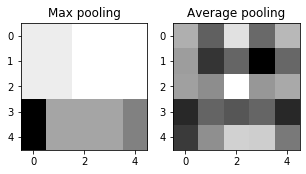

In [5]:
#作業修改
np.random.seed(1)
A_prev = x_pad
hparameters = {'stride':1, 'f':3}

A_max, cache = pool_forward(A_prev, hparameters)
print("mode = max")
print("A =", A_max)

plt.show()
print()

A_average, cache = pool_forward(A_prev, hparameters, mode = "average")
print("mode = average")
print("A =", A_average)

fig, ax = plt.subplots(1, 2)
ax[0].set_title("Max pooling")
ax[0].imshow(A_max[0,:,:,0])
ax[1].set_title('Average pooling')
ax[1].imshow(A_average[0,:,:,0])
plt.show()